# LINEAR MODELS REGRESSION

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import tools

In [21]:
auto = pd.read_csv('dataset.csv', index_col='name')
auto['ulke'] = auto.origin.replace([1,2,3], ['USA', 'Europe', 'Japan'])
print(auto.head())
print(auto.index)
print(auto.columns)

                            mpg  cylinders  displacement  ... year  origin  ulke
name                                                      ...                   
chevrolet chevelle malibu  18.0          8         307.0  ...   70       1   USA
buick skylark 320          15.0          8         350.0  ...   70       1   USA
plymouth satellite         18.0          8         318.0  ...   70       1   USA
amc rebel sst              16.0          8         304.0  ...   70       1   USA
ford torino                17.0          8         302.0  ...   70       1   USA

[5 rows x 9 columns]
Index(['chevrolet chevelle malibu', 'buick skylark 320', 'plymouth satellite',
       'amc rebel sst', 'ford torino', 'ford galaxie 500', 'chevrolet impala',
       'plymouth fury iii', 'pontiac catalina', 'amc ambassador dpl',
       ...
       'chrysler lebaron medallion', 'ford granada l', 'toyota celica gt',
       'dodge charger 2.2', 'chevrolet camaro', 'ford mustang gl', 'vw pickup',
       'dodge ram

In [23]:
auto.isnull().any()
auto.dtypes
auto.horsepower.unique()
auto = auto[auto.horsepower != '?']
print('?' in auto.horsepower)
auto.shape

False


(392, 9)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


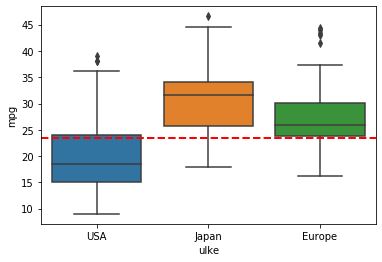

In [24]:
auto.horsepower = auto.horsepower.astype('float')
auto.dtypes

fig = sns.boxplot(x='ulke', y='mpg', data=auto)
plt.axhline(auto.mpg.mean(), color='r', linestyle='dashed', linewidth=2)

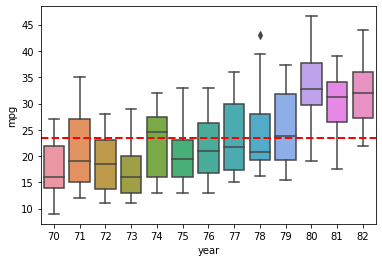

In [25]:
fig = sns.boxplot(x='year', y='mpg', data=auto)
plt.axhline(auto.mpg.mean(),color='r',linestyle='dashed',linewidth=2)

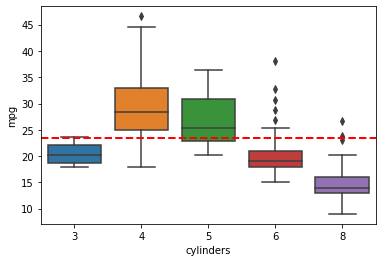

In [26]:
fig = sns.boxplot(x='cylinders', y='mpg', data=auto)
plt.axhline(auto.mpg.mean(),color='r',linestyle='dashed',linewidth=2)

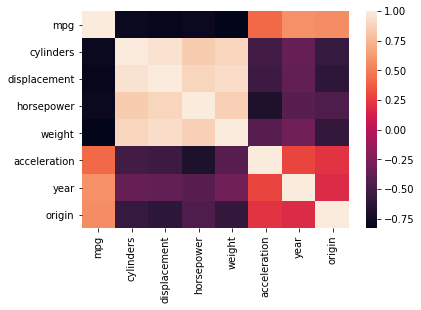

In [27]:
# correlation matrix
corrMatrix = auto.corr()
sns.heatmap(corrMatrix)

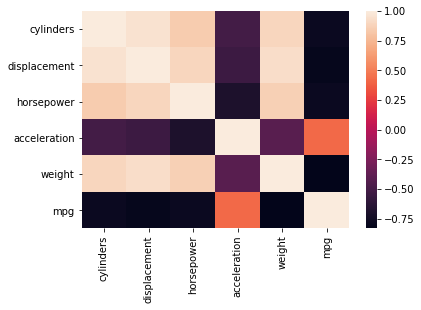

In [28]:
factors = ['cylinders', 'displacement', 'horsepower', 'acceleration', 'weight', 'mpg']
corrMatris = auto[factors].corr()
sns.heatmap(corrMatris)

In [29]:
# A 
# columns of the input matrix
X = pd.DataFrame(auto['horsepower'])
# adding 1's
X = sm.add_constant(X) 
y = auto['mpg']
linearModel = sm.regression.linear_model.OLS(y, X)
fit = linearModel.fit()
# fit.summary()

predNew = fit.get_prediction([1, 98])
predNew.summary_frame(alpha=0.05) # %95 confidence

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,24.467077,0.251262,23.973079,24.961075,14.809396,34.124758


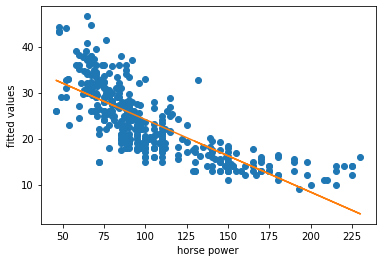

In [30]:
# B
plt.plot(X['horsepower'], y, 'o')
plt.plot(X['horsepower'], fit.fittedvalues, '-')
plt.xlabel('horse power')
plt.ylabel('fitted values')
plt.show()

In [0]:
# C
tools.plots(fit, 'mpg', auto)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


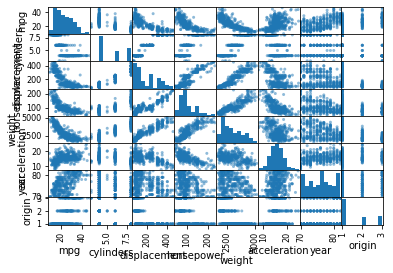

In [17]:
# 9. A B
# plotting columns against each other
pd.plotting.scatter_matrix(auto)
auto.corr()

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


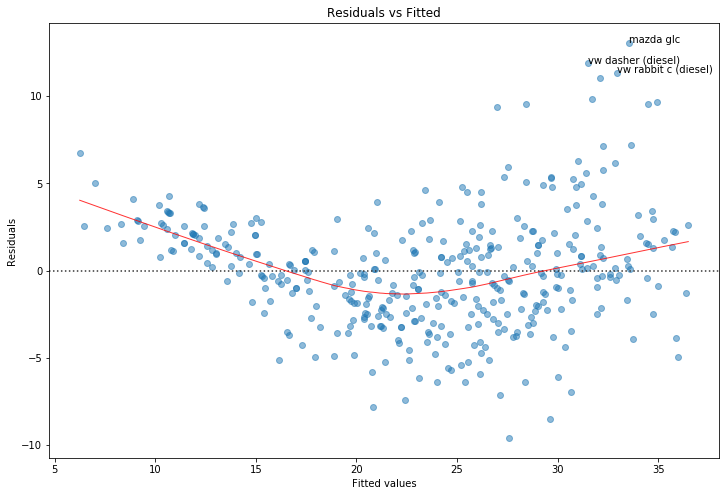

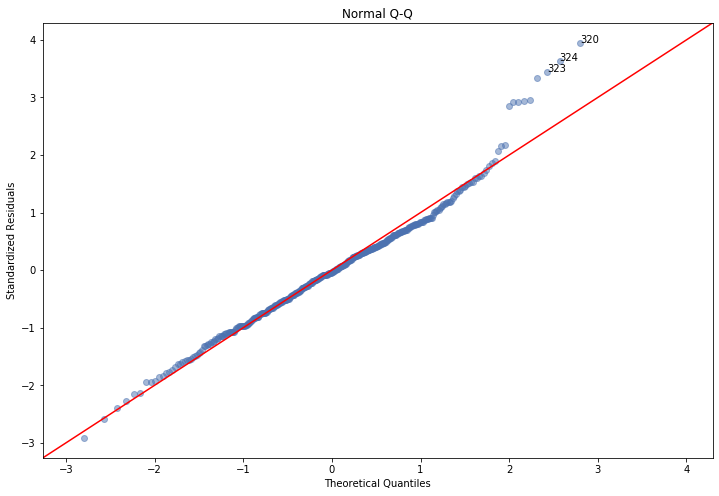

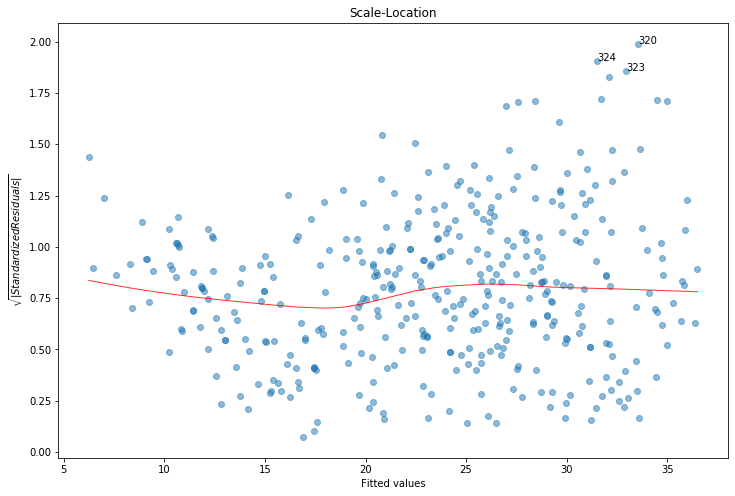

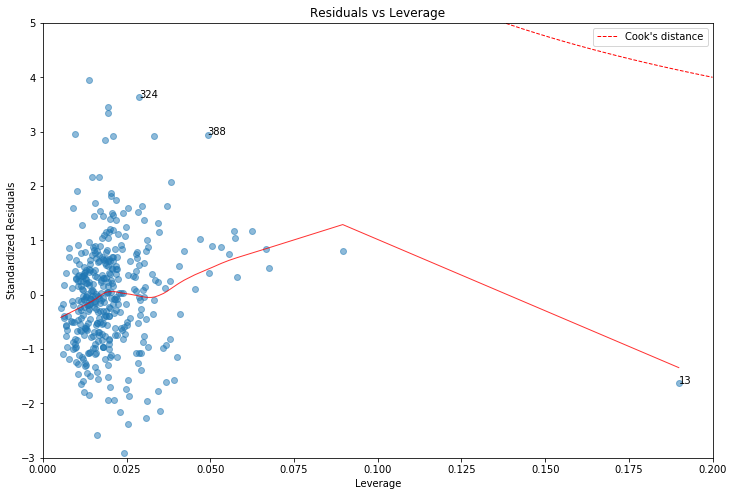

In [18]:
# C
X = pd.DataFrame(auto.iloc[:, 1:8])
X = sm.add_constant(X)
# definition of dependent variable vector
y = auto['mpg']
multipleLinearModel = sm.regression.linear_model.OLS(y, X)
fit = multipleLinearModel.fit()
# fit.summary()

tools.plots(fit, 'mpg', auto)

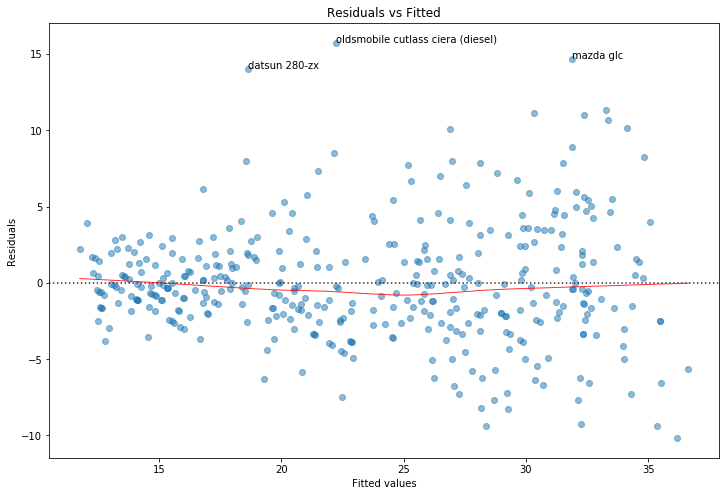

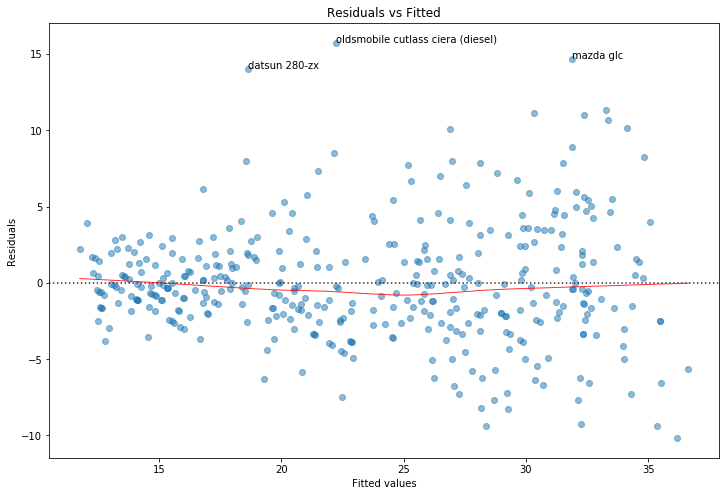

In [19]:
# E
import statsmodels.formula.api as smf
model = smf.ols(formula='mpg ~ horsepower + weight + horsepower * weight + C(cylinders)', data=auto)
fit = model.fit()
# fit.summary()
tools.residualPlot(fit, 'mpg', auto)

In [20]:
# F
auto['horsepower2'] = auto['horsepower']**2
X = pd.DataFrame(auto.loc[:, ['horsepower', 'horsepower2']])
X = sm.add_constant(X)
# definition of dependent variable vector
y = auto['mpg'] 
quadraticModel = sm.regression.linear_model.OLS(y, X)
fit = quadraticModel.fit()
# fit.summary()

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
